In [1]:
import requests
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline

In [13]:
total_confirmed = requests.get('https://covid.ourworldindata.org/data/total_cases.csv')
total_deaths = requests.get('https://covid.ourworldindata.org/data/total_deaths.csv')
new_confirmed = requests.get('https://covid.ourworldindata.org/data/new_cases.csv')
new_deaths = requests.get('https://covid.ourworldindata.org/data/new_deaths.csv')
full_dataset = requests.get('https://covid.ourworldindata.org/data/full_data.csv')

In [15]:
with open('./total_confirmed.csv', 'wb') as f:
    f.write(total_confirmed.content)
    
with open('./total_deaths.csv', 'wb') as f:
    f.write(total_deaths.content)
    
with open('./new_confirmed.csv', 'wb') as f:
    f.write(new_confirmed.content)
    
with open('./new_deaths.csv', 'wb') as f:
    f.write(new_deaths.content)
    
with open('./full_dataset.csv', 'wb') as f:
    f.write(full_dataset.content)

In [26]:
total_confirmed = pd.read_csv('total_confirmed.csv', parse_dates=['date'])
total_confirmed.head()

,date,World,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Australia,...,Trinidad and Tobago,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Vatican,Venezuela,Vietnam
0,2020-01-21,282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-22,314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-23,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,2020-01-24,846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0
4,2020-01-25,1320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0


In [107]:
full_dataset = pd.read_csv('full_dataset.csv', parse_dates=['date'])
full_dataset.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN


In [108]:
full_dataset = full_dataset.fillna(0)
full_dataset.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,0.0,0.0,1,0.0
1,2020-02-26,Afghanistan,0.0,0.0,1,0.0
2,2020-02-27,Afghanistan,0.0,0.0,1,0.0
3,2020-02-28,Afghanistan,0.0,0.0,1,0.0
4,2020-02-29,Afghanistan,0.0,0.0,1,0.0


In [31]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407 entries, 0 to 2406
Data columns (total 6 columns):
date            2407 non-null datetime64[ns]
location        2407 non-null object
new_cases       2407 non-null float64
new_deaths      2407 non-null float64
total_cases     2407 non-null int64
total_deaths    2407 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 113.0+ KB


In [32]:
full_dataset.describe()

,new_cases,new_deaths,total_cases,total_deaths
count,2407.000000,2407.000000,2407.000000,2407.000000
mean,118.019942,4.441213,2583.628583,82.328209
std,757.346030,24.471873,13551.360762,462.077623
min,-10.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000
50%,0.000000,0.000000,8.000000,0.000000
75%,5.000000,0.000000,36.500000,0.000000
max,19572.000000,434.000000,142539.000000,5393.000000


In [103]:
full_dataset[full_dataset.total_cases == full_dataset.total_cases.max()]

,date,location,new_cases,new_deaths,total_cases,total_deaths
467,2020-03-14,China,30.0,14.0,81021,3194.0


In [109]:
full_dataset = full_dataset.sort_values(['date', 'total_cases'])

In [110]:
world_dataset = full_dataset[full_dataset.location == 'World']
full_dataset = full_dataset[full_dataset.location != 'World']

In [35]:
full_dataset[full_dataset.total_cases == full_dataset.total_cases.max()]

,date,location,new_cases,new_deaths,total_cases,total_deaths
467,2020-03-14,China,30.0,14.0,81021,3194.0


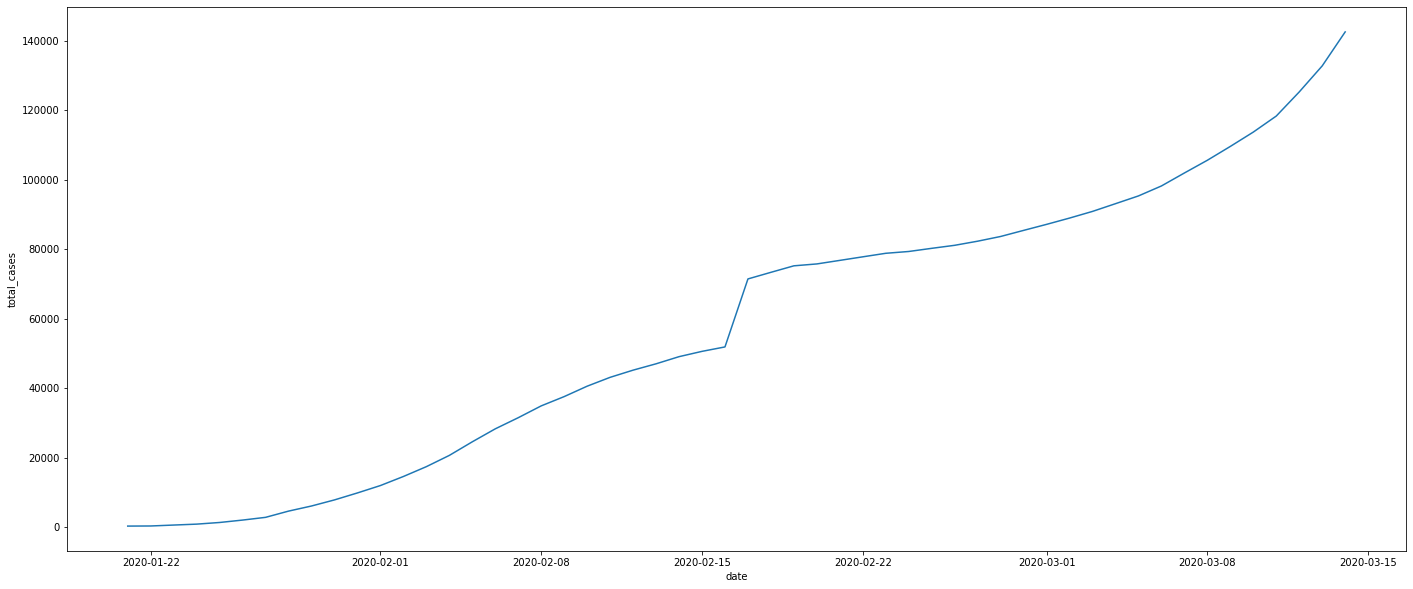

In [67]:
plt.figure(figsize = (24, 10))
ax = sns.lineplot(x="date", y="total_cases", markers=True, data=world_dataset)

In [114]:
no_china_dataset = full_dataset[full_dataset.location != 'China']

In [115]:
highest_countries = no_china_dataset.nlargest(4, ['date', 'total_cases']).location
highest_countries

1085          Italy
986            Iran
1701    South Korea
1961          Spain
Name: location, dtype: object

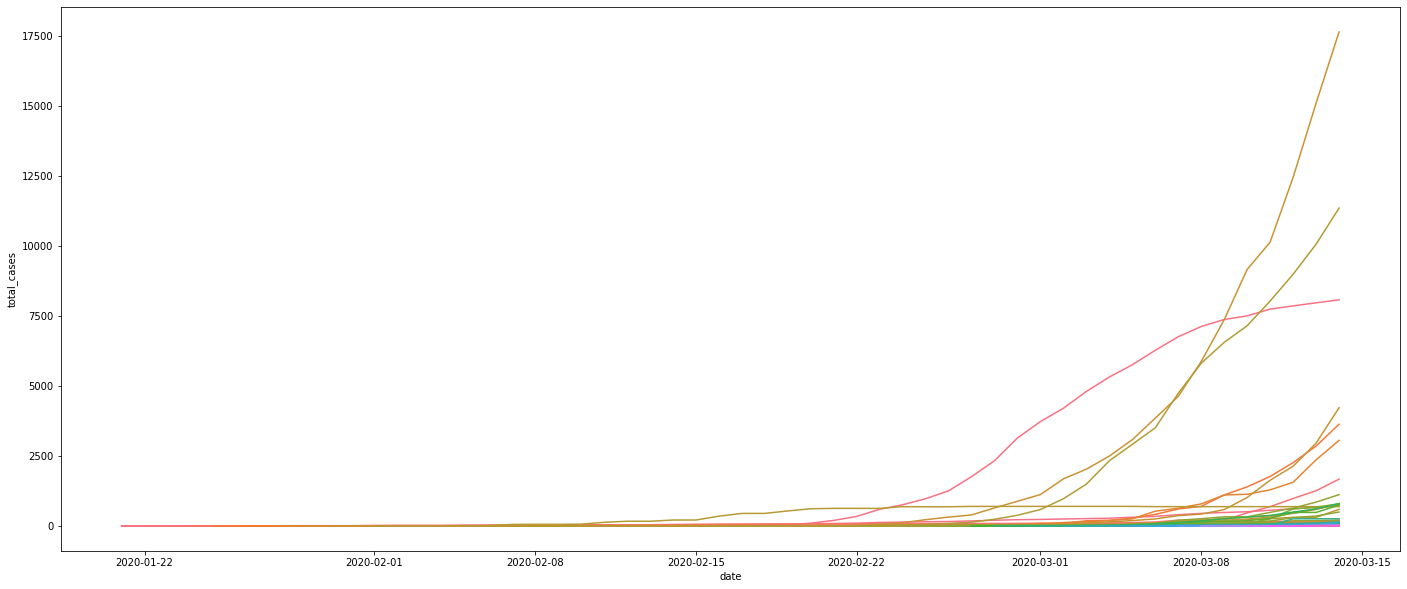

In [118]:
plt.figure(figsize = (24, 10))
ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=no_china_dataset)
# ax.annotate(full_dataset.location[full_dataset.total_cases.max()], xy=(full_dataset.date.max(), full_dataset.total_cases.max()), xytext=(full_dataset.date.max(), full_dataset.total_cases.max()), arrowprops=dict(facecolor='black', shrink=0.05))